In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pathlib import Path
from ds100_utils import fetch_and_cache
from datetime import datetime
from IPython.display import display

import yaml

plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['figure.dpi'] = 100
sns.set()

### Quicksort Lecture Quality: Some Basic Visualizations

In [2]:
qr = pd.read_csv("quicksort_rating.csv", header = 0, names = ["attended", "rating"])
qr.head(10)

,attended,rating
0,"No, not yet",5
1,"Yes, watched on Thursday 4/11 or later",9
2,"Yes, watched on or before Wednesday 4/10",10
3,"Yes, watched on or before Wednesday 4/10",9
4,"No, not yet",0
5,"No, not yet",0
6,"Yes, attended",8
7,"Yes, attended",10
8,"Yes, watched on or before Wednesday 4/10",0
9,"Yes, watched on or before Wednesday 4/10",7


In [3]:
qr_attended = qr[qr["attended"].str.startswith("Yes")]
qr_attended.head()

,attended,rating
1,"Yes, watched on Thursday 4/11 or later",9
2,"Yes, watched on or before Wednesday 4/10",10
3,"Yes, watched on or before Wednesday 4/10",9
6,"Yes, attended",8
7,"Yes, attended",10


/home/hug/miniconda2/envs/data100/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


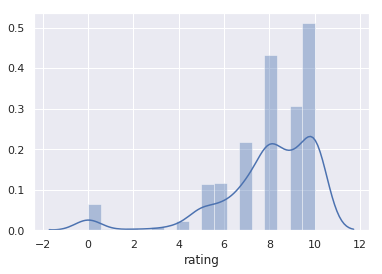

In [4]:
sns.distplot(qr_attended["rating"])

/home/hug/miniconda2/envs/data100/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


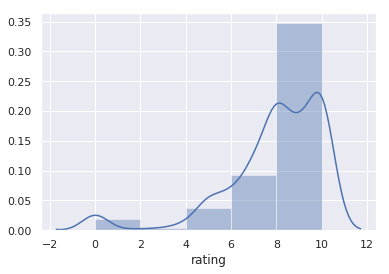

In [5]:
sns.distplot(qr_attended["rating"], bins = range(0, 12, 2))

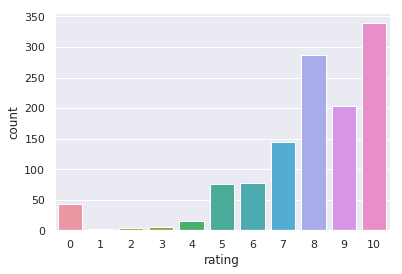

In [8]:
sns.countplot(qr_attended["rating"])

/home/hug/miniconda2/envs/data100/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


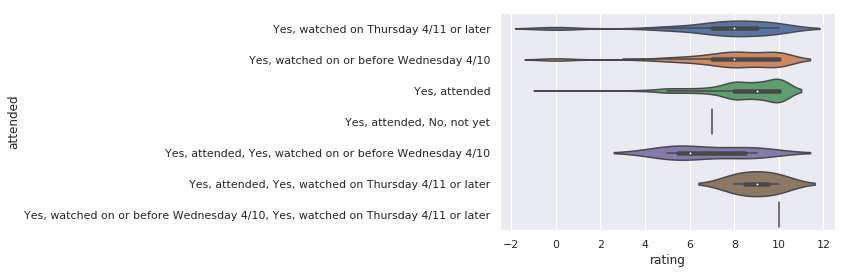

In [7]:
sns.violinplot(data = qr_attended, x = "rating", y="attended")

### Pacing Information

Suppose you were teaching a large class and want to survey them. Let's consider two choices:
1. Send out a survey to everyone and wait for results.
2. Send out a survey to only a small subset of students and then bug them until all of them have replied.

In this case study, we'll explore the difference between these two ideas.

#### Convenience Sampling vs. Simple Random Samples

In 61B, I have students fill out a weekly survey every week in exchange for a small number of points, with the lowest four surveys dropped.

During week 10 in Sp19, I asked students in 61B: "How do you feel about the pace of the class overall? Answer for you personally, not how you think it is paced for everyone else. Pick 4 if the pace is just right."

Is this a census or a convenience sample?

Let the `true_pace` dataframe be a data frame that somehow magically contains every student's opinion on pace, even if they didn't fill out the survey.

In [160]:
true_pace = pd.read_csv("61b_pace_week_10.csv", header = 0, names = ["pace"])
#true_pace.head(10)

The `collect_convenience_sample` function simulates the process of collecting a convenience sample. This function models the universe by assuming that students who think the class is way too slow (rate the pace as a 1) reply with probability 0.95, students who give pace rating 2 reply with probability 0.9, those with pace rating 3 probability 0.85, and so on as given in the table below:

| pace |  p |
|---|----|
| 1 | 95 |
| 2 | 90 |
| 3 | 85 |
| 4 | 60 |
| 5 | 50 |
| 6 | 40 |
| 7 | 30 |

In [ ]:
def collect_convenience_sample(true_pace): 
    """Collects a convenience sample from the """
    def reply(rating):
        reply_chance = [0.95, 0.90, 0.85, 0.60, 0.50, 0.40, 0.30]
        rn = np.random.uniform()
        return rn < reply_chance[rating - 1]    
    
    true_pace_copy = df.copy()
    true_pace_copy["reply"] = true_pace_copy["pace"].apply(reply)
    return true_pace_copy.query("reply == True")[["pace"]]

In [162]:
collect_convenience_sample(true_pace)

,pace
0,7
1,5
2,4
3,5
4,5
...,...
1403,1
1409,6
1411,4
1413,5


One way to try to assess the overall feeling of the class is to compute the mean of the ratings for everyone who replied.

In [167]:
np.mean(collect_convenience_sample(true_pace))

pace    4.641656
dtype: float64

Every time we run the cell above, we get a different mean. This is because each time we draw a new sample. 

An alternate approach is to use a simple random sample. In this approach, we'd pick a small group of 50 random students and then keep bugging them until they replied. The function below collects a simple random sample.

In [169]:
def collect_srs(df, n):   
    return df.sample(n)

This time, we pick the size of our  simple random sample in advance. Let's suppose our sample size is 100. Every time you run the command below, you'll get a different average pace rating.

In [179]:
np.mean(collect_srs(df, 100))

pace    4.92
dtype: float64

Which approach is better? What can we do to better compare these two approaches?

In [186]:
cs = np.array([np.mean(collect_convenience_sample(df)) for x in range(200)])

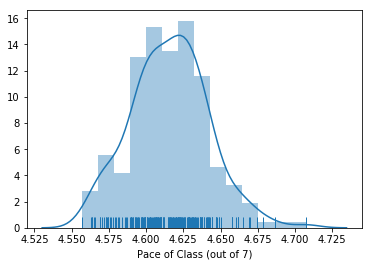

In [187]:
sns.distplot(cs, rug = "True", axlabel = "Pace of Class (out of 7)")

In [188]:
def collect_srs(df, n):   
    return df.sample(n)

np.mean(collect_srs(df, 100))

pace    4.82
dtype: float64

In [189]:
srs = np.array([np.mean(collect_srs(df, 100)) for x in range(200)])

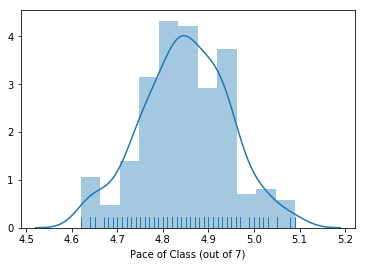

In [190]:
sns.distplot(srs, rug = "True", axlabel = "Pace of Class (out of 7)")

Or on one axis:

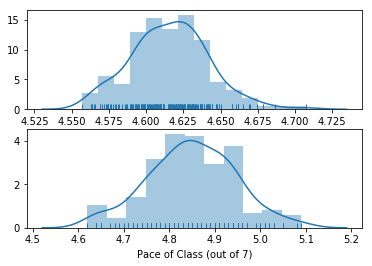

In [191]:
plt.subplot(2, 1, 1)
sns.distplot(cs, rug = "True", axlabel = "Pace of Class (out of 7)")
plt.subplot(2, 1, 2)
sns.distplot(srs, rug = "True", axlabel = "Pace of Class (out of 7)")

Looking at the plot above, which do you like better?

Another perspective: Since we have access to the "true" data, we can compute the true mean.

In [193]:
np.mean(true_pace["pace"])

4.855328158080452

Which do you like better now? Here, we see that the variance of the srs is larger, but mean of the srs is closer to the correct answer. This is evocative of what we'll call the "bias-variance tradeoff" after the midterm.

We can adjust the variance of our survey by adjusting the number of samples in our SRS. If we sample only one student, we'll have high variance.

As we increase the number of students sampled, variance will decrease.

0.10891799


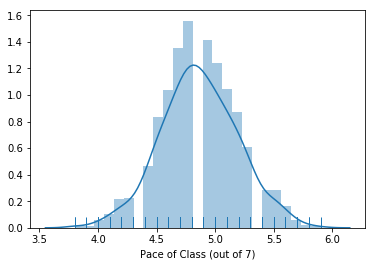

In [233]:
num_samples = 10
simulated_average_pace_ratings = np.array([np.mean(collect_srs(df, num_samples)) for x in range(1000)])
sns.distplot(simulated_average_pace_ratings, rug = "True", axlabel = "Pace of Class (out of 7)")
print(np.var(simulated_average_pace_ratings))

#### Expectation and Variance with 0-1 Variables

Let's suppose we're interested in looking at the number of students who give a rating of 7/7, i.e. that rate 61B as way too fast.

Looking at our data, we see that the probability of rating the class 7/7 is 7.6%.

In [196]:
len(true_pace.query("pace == 7")) / len(true_pace)

0.07621736062103035

Suppose we collect a sample of 4 students from our original population of 1417. Let $X_i = 1$ if student i rates the class as a 7, and let $X_i = 0$ otherwise.

What is $\mathbb{E}[X_1 + X_2 + X_3 + X_4]$? Let's determine this computationally through repeated simulation of an SRS of size 4. You should be able to derive this number yourself without needing to run any simulations.

In [271]:
def get_num_7s_from_srs_of_size_n(n):
    return sum(collect_srs(df, n)["pace"] == 7)

In [289]:
#compute the average number of 7s seen across 10000 samples of X1 through X4.
np.mean([get_num_7s_from_srs_of_size_n(4) for x in range(10000)])

0.3033

Similarly we can also find $Var[X_1 + X_2 + X_3 + X_4]$, i.e. the variance of the number of 7s. The code below approximates this quantity through repeated simulation of an SRS of size 4. We also discussed how to compute this in lecture, and you should be able to compute this without simulation.

In [290]:
#compute the variance of the number of 7s seen across 10000 samples of X1 through X4.
np.var([get_num_7s_from_srs_of_size_n(4) for x in range(10000)])

0.2687503900000001

# Congressional Data

In [10]:
# From Sp19 Lecture 4: current members of congress
base_url = 'https://github.com/unitedstates/congress-legislators/raw/master/'
current_path = 'legislators-current.yaml'
f = fetch_and_cache(base_url + current_path, current_path)
current_data = yaml.load(open(f))

def birthdays(data):
    return pd.DataFrame(
        columns=['leg_id', 'first', 'last', 'gender', 'terms', 'birthday'],
        data=[[x['id']['bioguide'], 
               x['name']['first'],
               x['name']['last'],
               x['bio']['gender'],
               len(x['terms']),
               pd.to_datetime(x['bio'].get('birthday'), yearfirst=True)
              ] for x in data])

current_legs = birthdays(current_data)
current_legs.head(3)

Using cached version that was downloaded (UTC): Tue Oct  8 02:01:13 2019


,leg_id,first,last,gender,terms,birthday
0,B000944,Sherrod,Brown,M,10,1952-11-09
1,C000127,Maria,Cantwell,F,5,1958-10-13
2,C000141,Benjamin,Cardin,M,13,1943-10-05


In [11]:
# Past members of congress
past_path = 'legislators-historical.yaml'
f = fetch_and_cache(base_url + past_path, past_path)
past_data = yaml.load(open(f))

past_legs = birthdays(past_data)
past_legs.head(3)

Using cached version that was downloaded (UTC): Tue Oct  8 02:01:20 2019


,leg_id,first,last,gender,terms,birthday
0,B000226,Richard,Bassett,M,1,1745-04-02
1,B000546,Theodorick,Bland,M,1,1742-03-21
2,B001086,Aedanus,Burke,M,1,1743-06-16


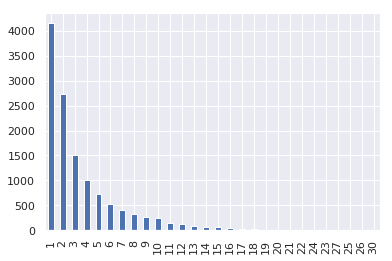

In [12]:
legs = pd.concat([past_legs, current_legs]).reset_index(drop=True)
assert legs.shape[0] == len(legs['leg_id'].unique()) # No repeats
legs['terms'].value_counts().plot(kind='bar');

# header

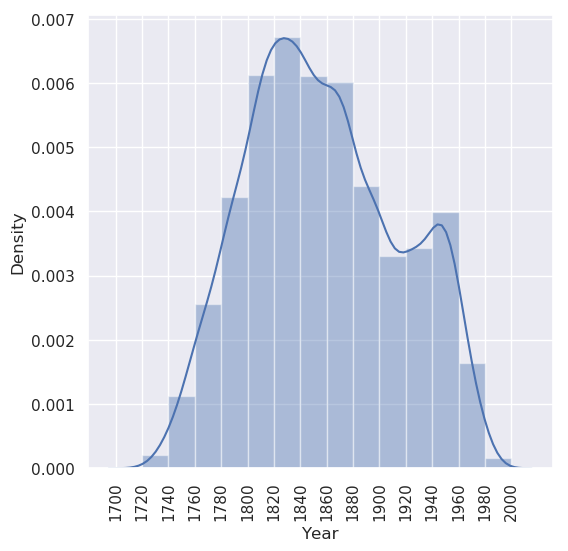

In [176]:
bins = np.linspace(1700, 2000, 16)
sns.distplot(legs['birthday'].dropna().dt.year, bins=bins)
plt.xlabel('Year');
plt.xticks(bins, rotation=90)
plt.ylabel('Density');

## Question
According to the histogram, about what proportion of all members of congress were born between 1840 and 1880?

In [177]:
0.006 * (40)

0.24

## Question
How do you compute the exact proportion using Pandas?

In [178]:
# Solution 1
bday = legs['birthday']
sum((bday.dt.year >= 1840) & (bday.dt.year < 1880)) / len(bday)

0.23162352189197827

In [179]:
# Solution 2
sum((bday.dt.year >= 1840) & (bday.dt.year < 1880)) / len(bday.dropna())

0.24233051910056005

In [180]:
bday.isnull().value_counts()

False    11963
True       553
Name: birthday, dtype: int64

In [181]:
sum(bday.isnull()) / len(bday)

0.0441834451901566

# Question
How do you think the missing birthdays bias the birthyear distribution?

```
(a) Low bins have too little density
(b) High bins have too little density
(c) All bins have too little density
(d) Impossible to tell
```

Could inspecting the data further help answer this question?

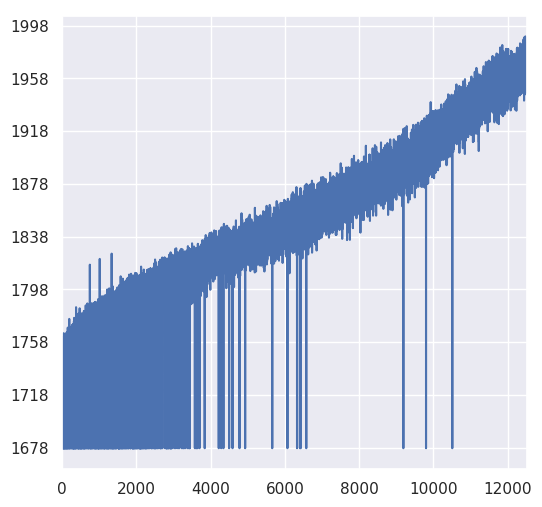

In [182]:
legs['birthday'].plot();

## Question

How would you better visualize the rate of missing values?

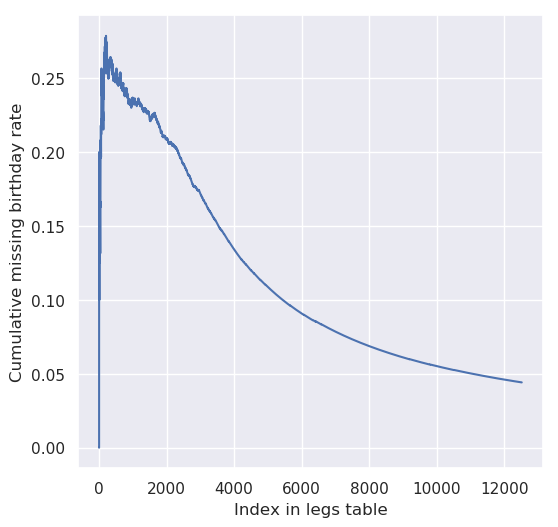

In [183]:
plt.plot(np.cumsum(bday.isnull())/np.arange(len(bday)));
plt.xlabel('Index in legs table')
plt.ylabel('Cumulative missing birthday rate');

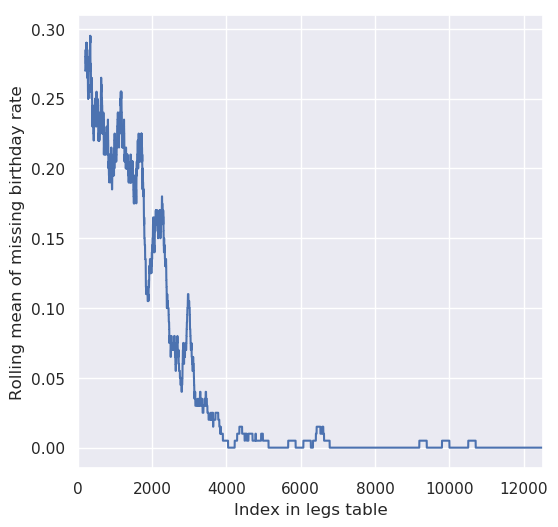

In [184]:
bday.isnull().rolling(200).mean().plot();
plt.xlabel('Index in legs table')
plt.ylabel('Rolling mean of missing birthday rate');

# Data Cleaning

In [185]:
past_data[0]

{'bio': {'birthday': '1745-04-02', 'gender': 'M'},
 'id': {'bioguide': 'B000226',
  'google_entity_id': 'kg:/m/02pz46',
  'govtrack': 401222,
  'icpsr': 507,
  'wikidata': 'Q518823',
  'wikipedia': 'Richard Bassett (politician)'},
 'name': {'first': 'Richard', 'last': 'Bassett'},
 'terms': [{'class': 2,
   'end': '1793-03-03',
   'party': 'Anti-Administration',
   'start': '1789-03-04',
   'state': 'DE',
   'type': 'sen'}]}

## Question

What will be the granularity of a table that includes term information?

In [186]:
past_data[10000]

{'bio': {'birthday': '1894-01-08', 'gender': 'M'},
 'id': {'bioguide': 'H000717',
  'google_entity_id': 'kg:/m/0dn46g',
  'govtrack': 405569,
  'house_history': 15170,
  'icpsr': 4518,
  'wikidata': 'Q5366586',
  'wikipedia': 'Elmer J. Holland'},
 'name': {'first': 'Elmer', 'last': 'Holland', 'middle': 'Joseph'},
 'terms': [{'district': 33,
   'end': '1943-01-03',
   'party': 'Democrat',
   'start': '1941-01-03',
   'state': 'PA',
   'type': 'rep'},
  {'district': 30,
   'end': '1957-01-03',
   'party': 'Democrat',
   'start': '1955-01-05',
   'state': 'PA',
   'type': 'rep'},
  {'district': 30,
   'end': '1959-01-03',
   'party': 'Democrat',
   'start': '1957-01-03',
   'state': 'PA',
   'type': 'rep'},
  {'district': 30,
   'end': '1961-01-03',
   'party': 'Democrat',
   'start': '1959-01-07',
   'state': 'PA',
   'type': 'rep'},
  {'district': 30,
   'end': '1963-01-03',
   'party': 'Democrat',
   'start': '1961-01-03',
   'state': 'PA',
   'type': 'rep'},
  {'district': 20,
   'end

In [187]:
columns=['leg_id', 'term', 'type', 'start', 'end', 'state', 'party']
data = []
for x in past_data + current_data:
    for i, t in enumerate(x['terms']):
        data.append([
            x['id']['bioguide'], 
            i + 1,
            t['type'],
            pd.to_datetime(t['start'], yearfirst=True),
            pd.to_datetime(t['end'], yearfirst=True),
            t['state'],
            t.get('party'),
        ])
        
terms = pd.DataFrame(columns=columns, data=data)
terms.head()

,leg_id,term,type,start,end,state,party
0,B000226,1,sen,1789-03-04,1793-03-03,DE,Anti-Administration
1,B000546,1,rep,1789-03-04,1791-03-03,VA,None
2,B001086,1,rep,1789-03-04,1791-03-03,SC,None
3,C000187,1,rep,1789-03-04,1791-03-03,MD,None
4,C000538,1,rep,1789-03-04,1791-03-03,PA,None


In [188]:
terms.shape

(44004, 7)

In [189]:
terms.groupby(['leg_id', 'start']).size().sort_values(ascending=False).head(15)

leg_id   start     
A000083  1881-12-05    2
G000414  1857-12-07    2
W000238  1827-12-03    2
B000769  1905-12-04    2
S001073  1801-12-07    2
B000434  1813-05-24    2
R000063  1851-12-01    2
A000130  1889-12-02    2
M000034  1815-12-04    2
C000150  1861-07-04    2
V000074  1811-11-04    2
L000393  1893-08-07    2
G000070  1833-12-02    1
         1835-12-07    1
G000071  1957-01-03    1
dtype: int64

In [190]:
terms['party'].value_counts()

Democrat                      20448
Republican                    18870
Whig                           1203
Jackson                         880
Federalist                      819
                              ...  
Democratic and Union Labor        1
Pro-administration                1
Republican-Conservative           1
Adams Democrat                    1
Silver                            1
Name: party, Length: 66, dtype: int64

In [191]:
terms['party'].value_counts().head(8)

Democrat                    20448
Republican                  18870
Whig                         1203
Jackson                       880
Federalist                    819
Adams                         256
Ind. Republican-Democrat      128
American                       84
Name: party, dtype: int64

## Question

How many terms were under the American party and smaller parties?

In [192]:
sum(terms['party'].value_counts().loc['American':])

941

In [193]:
sum(terms['party'].value_counts().iloc[7:])

941

In [194]:
terms['party'].isnull().value_counts()

False    43545
True       459
Name: party, dtype: int64

# Question

What proportion of all members of congress ever changed parties?

In [195]:
parties = (terms['party']
           .groupby(terms['leg_id'])
           .agg(lambda s: len(set(s)))) # Also .nunique()

parties.value_counts()

1    11659
2      694
3      146
4       14
5        2
6        1
Name: party, dtype: int64

In [196]:
sum(parties > 1) / len(parties)

0.06847235538510707

In [197]:
counts = terms.groupby('leg_id').nunique()
counts['party'].value_counts()

1    11590
2      643
0      167
3      101
4       12
5        2
6        1
Name: party, dtype: int64

In [198]:
counts['state'].value_counts()

1    12456
2       58
3        2
Name: state, dtype: int64

# Visualization

In [199]:
a = terms.groupby('start')
starts = a.nunique()
starts.head(10)

,leg_id,term,type,start,end,state,party
start,,,,,,,
1789-03-04,90,1,2,1,4,13,6
1790-01-01,5,1,1,1,4,3,3
1791-03-04,1,1,1,1,1,1,0
1791-10-24,80,2,2,1,5,15,6
1792-01-01,2,1,1,1,1,2,1
1792-06-18,1,1,1,1,1,1,1
1793-01-10,1,1,1,1,1,1,1
1793-12-02,120,3,2,1,5,16,6
1794-01-01,3,1,1,1,2,2,2


## Question

What visualization will help determine which term starts follow from national elections?

```
(a) A histogram of start values in terms
(b) A line plot of start values in terms
(c) A histogram of leg_id values in starts
(d) A line plot of leg_id values in starts
```

How would you use this visualization to focus future analysis on the composition of congress after each national election?

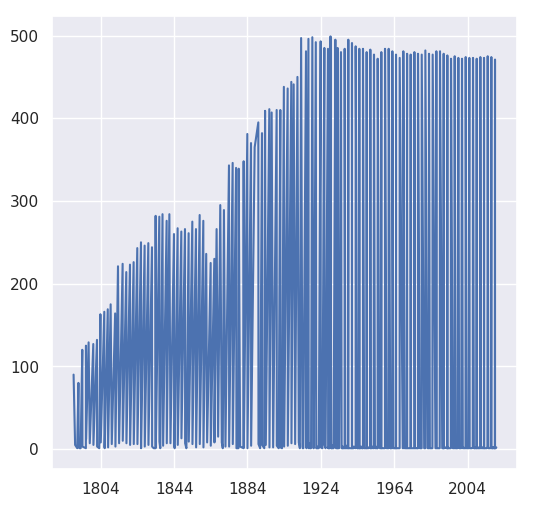

In [200]:
plt.plot(starts['leg_id']);

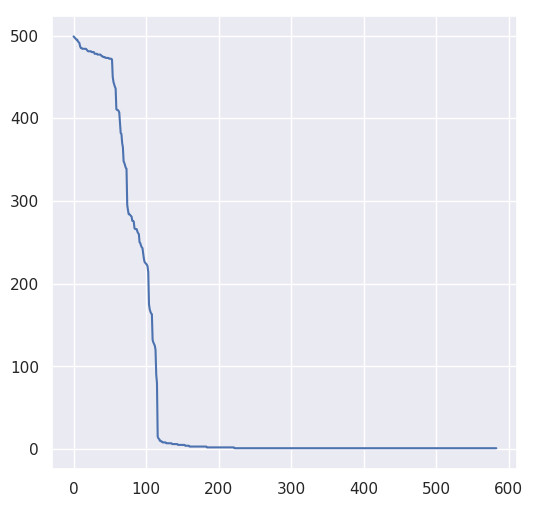

In [201]:
plt.plot(starts['leg_id'].sort_values(ascending=False).values);

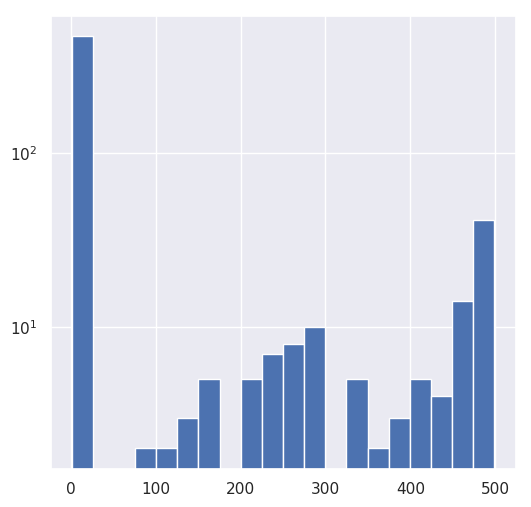

In [202]:
plt.hist(starts['leg_id'], bins=20, log=True);

In [203]:
sum((starts['leg_id'] > 15) & (starts['leg_id'] < 80))

0

In [204]:
starts[starts['leg_id'] > 15].index

DatetimeIndex(['1789-03-04', '1791-10-24', '1793-12-02', '1795-12-07',
               '1797-05-15', '1799-12-02', '1801-12-07', '1803-10-17',
               '1805-12-02', '1807-10-26',
               ...
               '2001-01-03', '2003-01-07', '2005-01-04', '2007-01-04',
               '2009-01-06', '2011-01-05', '2013-01-03', '2015-01-06',
               '2017-01-03', '2019-01-03'],
              dtype='datetime64[ns]', name='start', length=116, freq=None)

In [205]:
biannual = pd.to_datetime([f'01-25-{n}' for n in range(1941, 2020, 2)])
biannual

DatetimeIndex(['1941-01-25', '1943-01-25', '1945-01-25', '1947-01-25',
               '1949-01-25', '1951-01-25', '1953-01-25', '1955-01-25',
               '1957-01-25', '1959-01-25', '1961-01-25', '1963-01-25',
               '1965-01-25', '1967-01-25', '1969-01-25', '1971-01-25',
               '1973-01-25', '1975-01-25', '1977-01-25', '1979-01-25',
               '1981-01-25', '1983-01-25', '1985-01-25', '1987-01-25',
               '1989-01-25', '1991-01-25', '1993-01-25', '1995-01-25',
               '1997-01-25', '1999-01-25', '2001-01-25', '2003-01-25',
               '2005-01-25', '2007-01-25', '2009-01-25', '2011-01-25',
               '2013-01-25', '2015-01-25', '2017-01-25', '2019-01-25'],
              dtype='datetime64[ns]', freq=None)

## Question

Next up, we'll build a table of (term, election_date) pairs that contains the age of the person serving each term.

In [206]:
terms.merge(legs).sample(5)

,leg_id,term,type,start,end,state,party,first,last,gender,terms,birthday
17771,M000063,1,rep,1911-04-04,1913-03-03,NY,Democrat,James,Maher,M,5,1865-11-03
1813,E000197,1,rep,1803-10-17,1805-03-03,VA,Republican,John,Eppes,M,6,1773-04-19
38263,R000141,16,rep,2003-01-07,2005-01-03,OH,Republican,Ralph,Regula,M,18,1924-12-03
6694,W000031,1,rep,1853-12-05,1855-03-03,NY,Democrat,Hiram,Walbridge,M,1,1821-02-02
37568,D000432,2,rep,1983-01-03,1985-01-03,ND,Democrat,Byron,Dorgan,M,10,1942-05-14


In [207]:
# a bit of hack inspired by https://stackoverflow.com/questions/44367672/best-way-to-join-merge-by-range-in-pandas
# 
# a better tool for this will be SQL (to be discussed later)

dates_of_interest = biannual.values
term_endings = legs_with_terms["end"].values
term_beginnings = legs_with_terms["start"].values

i, j = np.where((dates_of_interest[:, None] >= term_beginnings) 
                & (dates_of_interest[:, None] <= term_endings))

df = pd.DataFrame(
    np.column_stack([biannual.values[i], legs_with_terms.values[j]]),
    columns=pd.Index(["election"]).append(legs_with_terms.columns)
)
df = df.astype({"election": "datetime64[ns]"})

df["age"] = np.round((df["election"] - df["birthday"]).dt.days / 365.0, 2)
df["type"] = df["type"].str.replace("sen", "Senate")
df["type"] = df["type"].str.replace("rep", "House")
df = df.rename(columns={"type": "chamber"})

df.head(10)

,election,leg_id,first,last,gender,terms,birthday,term,chamber,start,end,state,party,age
0,1941-01-25,B000941,Prentiss,Brown,M,4,1889-06-18,4,Senate,1937-01-05,1943-01-03,MI,Democrat,51.64
1,1941-01-25,B001055,William,Bulow,M,2,1869-01-13,2,Senate,1937-01-05,1943-01-03,SD,Democrat,72.08
2,1941-01-25,B001215,James,Byrnes,M,9,1882-05-02,9,Senate,1937-01-05,1941-12-31,SC,Democrat,58.77
3,1941-01-25,H000265,Byron,Harrison,M,8,1881-08-29,8,Senate,1937-01-05,1941-12-31,MS,Democrat,59.45
4,1941-01-25,H000543,Clyde,Herring,M,1,1879-05-03,1,Senate,1937-01-05,1943-01-03,IA,Democrat,61.77
5,1941-01-25,H000926,James,Hughes,M,1,1867-01-14,1,Senate,1937-01-05,1943-01-03,DE,Democrat,74.08
6,1941-01-25,L000198,Joshua,Lee,M,2,1892-01-23,2,Senate,1937-01-05,1943-01-03,OK,Democrat,49.04
7,1941-01-25,M000738,John,Miller,M,4,1888-05-15,4,Senate,1937-01-05,1941-12-31,AR,Democrat,52.73
8,1941-01-25,N000139,George,Norris,M,10,1861-07-11,10,Senate,1937-01-05,1943-01-03,NE,Independent,79.59
9,1941-01-25,S000157,Henry,Schwartz,M,1,1869-05-18,1,Senate,1937-01-05,1943-01-03,WY,Democrat,71.74


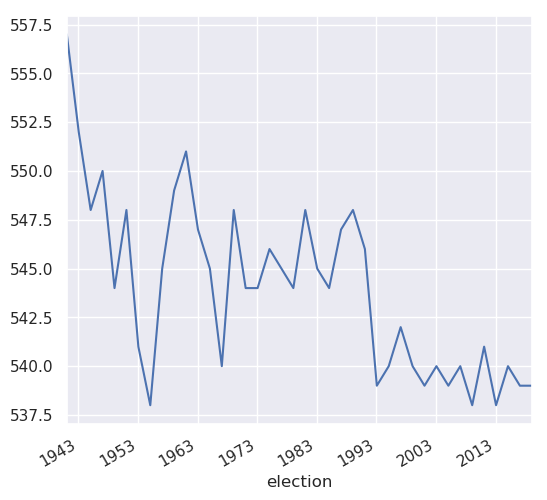

In [208]:
df.groupby('election').size().plot();

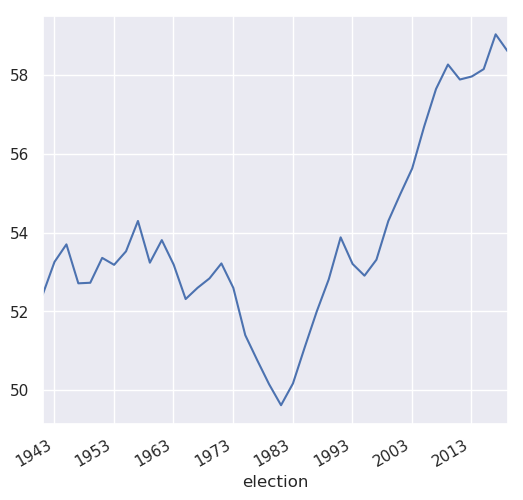

In [209]:
df.groupby('election').mean()['age'].plot();

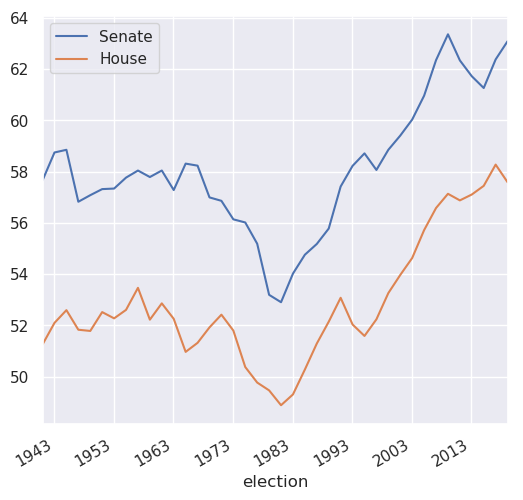

In [210]:
for chamber in ['Senate', 'House']:
    df[df['chamber']==chamber].groupby('election').mean()['age'].plot(label=chamber);
plt.legend();

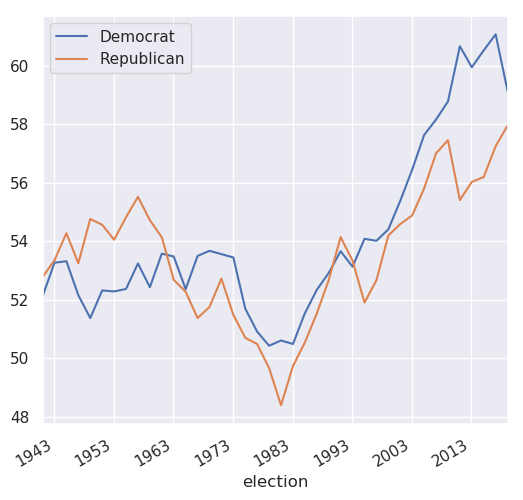

In [211]:
for party in ['Democrat', 'Republican']:
    df[df['party']==party].groupby('election').mean()['age'].plot(label=party);
plt.legend();

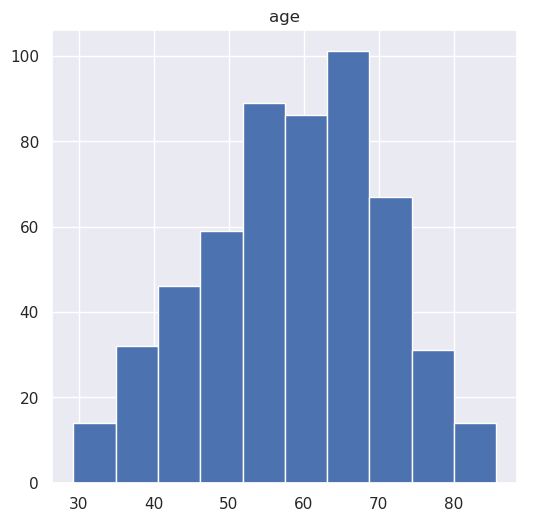

In [212]:
df[df['election'].dt.year == 2019].hist('age');

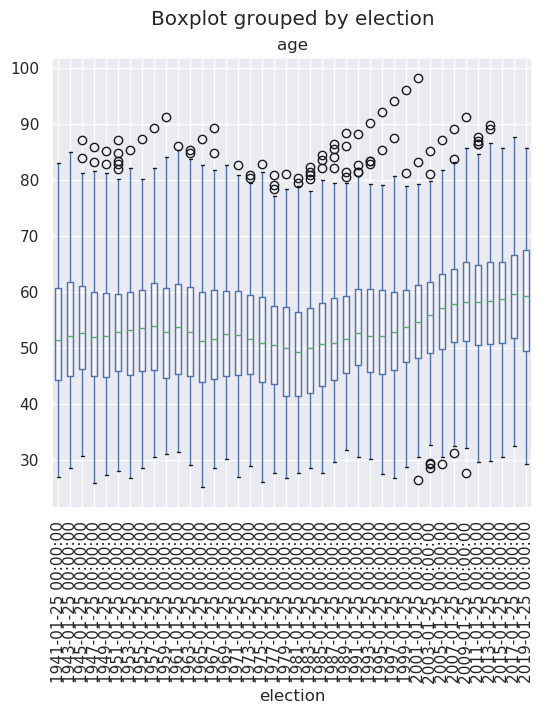

In [213]:
df.boxplot('age', 'election', rot=90);

## Question

What does the boxplot reveal that was not obvious from the line plot?

Why does this boxplot have diagonal lines of outliers?

#### Extra

We can also more naturally merge the terms, legislators, and elections using SQL.

In [214]:
import sqlite3
conn = sqlite3.connect(':memory:')
terms.to_sql('terms', conn)
legs.to_sql('legs', conn)
pd.DataFrame({'election': biannual}).to_sql('elections', conn)
for exp in conn.execute('SELECT sql FROM sqlite_master'):
    print(exp[0])

CREATE TABLE "terms" (
"index" INTEGER,
  "leg_id" TEXT,
  "term" INTEGER,
  "type" TEXT,
  "start" TIMESTAMP,
  "end" TIMESTAMP,
  "state" TEXT,
  "party" TEXT
)
CREATE INDEX "ix_terms_index"ON "terms" ("index")
CREATE TABLE "legs" (
"index" INTEGER,
  "leg_id" TEXT,
  "first" TEXT,
  "last" TEXT,
  "gender" TEXT,
  "terms" INTEGER,
  "birthday" TIMESTAMP
)
CREATE INDEX "ix_legs_index"ON "legs" ("index")
CREATE TABLE "elections" (
"index" INTEGER,
  "election" TIMESTAMP
)
CREATE INDEX "ix_elections_index"ON "elections" ("index")


In [215]:
query = """
    SELECT election, state, party, 
           gender, first, last, 
           birthday, election - birthday AS age,
           CASE type WHEN "sen" THEN "Senate"
                     WHEN "rep" THEN "House" END AS chamber
    FROM terms, legs, elections 
    WHERE start <= election AND election < end AND 
          terms.leg_id=legs.leg_id
    """

df_sql = pd.read_sql(query, conn)
df_sql.sample(5)

,election,state,party,gender,first,last,birthday,age,chamber
13780,1981-01-25 00:00:00,MI,Democrat,M,David,Bonior,1945-06-06 00:00:00,36.0,House
9532,1983-01-25 00:00:00,MD,Democrat,M,Clarence,Long,1908-12-11 00:00:00,75.0,House
11560,1969-01-25 00:00:00,RI,Democrat,M,Claiborne,Pell,1918-11-22 00:00:00,51.0,Senate
7789,1973-01-25 00:00:00,KY,Democrat,M,John,Breckinridge,1913-11-29 00:00:00,60.0,House
14989,2003-01-25 00:00:00,FL,Republican,M,E.,Shaw,1939-04-19 00:00:00,64.0,House


In [216]:
df_sql.dtypes

election     object
state        object
party        object
gender       object
first        object
last         object
birthday     object
age         float64
chamber      object
dtype: object